Data collectino and processing


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
from inspect import GEN_CLOSED
#loading csv data to a pandas dataframe
data=pd.read_csv(r'C:\Users\sumit\OneDrive\Desktop\machine learning\projects\gold price prediction\gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting statistial analyss of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
data1=data.drop(['Date'],axis=1)
correlation= data1.corr()

<Axes: >

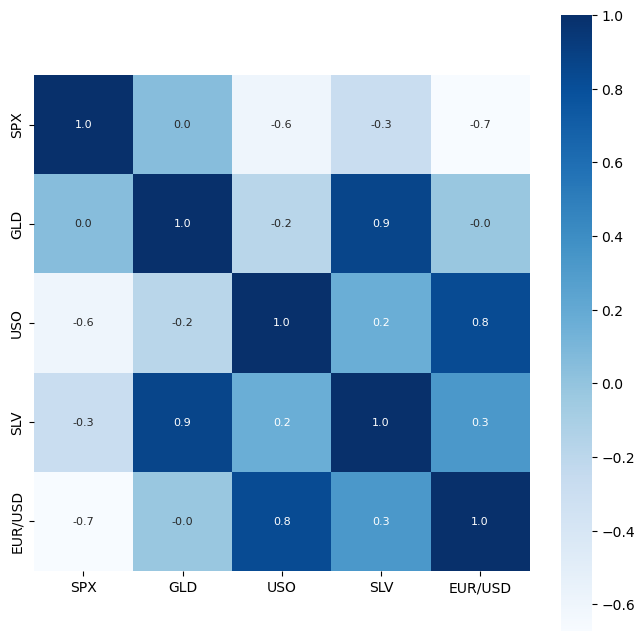

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

C:\Users\sumit\AppData\Local\Temp\ipykernel_11044\2278696031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

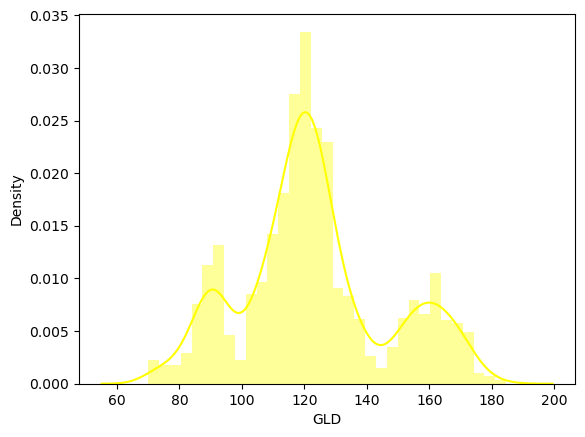

In [11]:
sns.distplot(data['GLD'],color='yellow')

In [12]:
X=data.drop(['GLD','Date'],axis=1)
Y=data['GLD']


splitting the data for the training and testeing purpose

In [14]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=2,test_size=0.2)

Model training Random orestt detection

In [16]:
regressor=RandomForestRegressor(n_estimators=100)

Training the model

In [18]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [20]:
test_data_predection= regressor.predict(X_test)

In [21]:
print(test_data_predection)

[168.68879991  81.96939992 115.91190027 127.77720066 120.55460115
 154.76029785 150.32799888 126.08390044 117.33889878 126.19870008
 116.66220126 171.91380047 141.28999912 167.80979852 115.11489962
 117.74580049 140.10070317 170.27080144 159.09290275 158.94769934
 155.12940027 125.2194003  176.2094988  157.352103   125.24840032
  94.02799959  77.39420047 120.71660012 119.09869938 167.55279921
  88.19450064 125.20180059  91.30650111 117.76100013 121.06269888
 136.38320138 115.65540111 114.73980064 146.83379948 107.20500094
 104.15040217  87.16529789 126.4443006  118.05069987 153.70959903
 119.52630043 108.33439986 107.9747982   93.12670032 127.15949775
  75.01450006 113.65969908 121.43960029 111.29979926 118.87009895
 120.6290989  159.8885006  168.08000059 147.20879697  85.97439858
  94.38680013  86.78949918  90.58550023 119.03370072 126.33050081
 127.72080013 171.27019983 122.21889947 117.46569875  98.89360042
 168.87280169 143.29269807 132.02540269 121.13120217 120.63979956
 119.75130

In [22]:
error_score=metrics.r2_score(Y_test,test_data_predection)
print("R square error:",error_score)

R square error: 0.9887474548078832


compare the actual value and predicted values in plt

In [24]:
Y_test=list(Y_test)

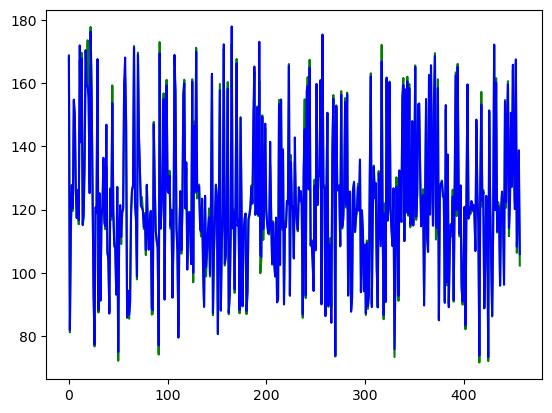

In [25]:
plt.plot(Y_test,color='green',label="actual values")
plt.plot(test_data_predection,color="blue",label="predicated values")

In [49]:
import pickle
pickle.dump(regressor,open('model1.pkl','wb'))
